# Pandas + Dask

Para este segundo ejercicio se utilizará Pandas y Dask como framework para hacer procesamiento en paralelo y se medirán los tiempos de ejecución, para comparar utilizando con el mismo codigo con Pandas

## Carga de datos

Los datos que se utilizara para este ejercicio vienen de la base de datos de mongo son comentarios de facebook y el archivo tiene un peso de 466,5 MB

### Configurar el cliente

En esta parte se configura el cliente, si no se proporciona por defecto se trabajara en local, si es posible para el calculo utilizar mas maquinas se pueden configurar según las documentación: https://distributed.dask.org/en/latest/quickstart.html

In [1]:
from dask.distributed import Client
client = Client()

In [2]:
client

<Client: 'tcp://127.0.0.1:42001' processes=4 threads=12, memory=25.20 GB>

In [3]:
print(client.scheduler_info())

{'type': 'Scheduler', 'id': 'Scheduler-7a8d8947-dcf7-4a99-b4f8-fcc62e0f502b', 'address': 'tcp://127.0.0.1:42001', 'services': {'dashboard': 8787}, 'started': 1619372046.2684026, 'workers': {'tcp://127.0.0.1:33969': {'type': 'Worker', 'id': 1, 'host': '127.0.0.1', 'resources': {}, 'local_directory': '/home/datascience3/Opt-Big-Data/Dask/dask-worker-space/worker-elfldkes', 'name': 1, 'nthreads': 3, 'memory_limit': 6299700224, 'last_seen': 1619372080.479402, 'services': {'dashboard': 40961}, 'metrics': {'cpu': 0.0, 'memory': 54411264, 'time': 1619372079.9801009, 'read_bytes': 4383.021649566046, 'write_bytes': 4243.180484812344, 'num_fds': 24, 'executing': 0, 'in_memory': 0, 'ready': 0, 'in_flight': 0, 'bandwidth': {'total': 100000000, 'workers': {}, 'types': {}}}, 'nanny': 'tcp://127.0.0.1:35919'}, 'tcp://127.0.0.1:34327': {'type': 'Worker', 'id': 2, 'host': '127.0.0.1', 'resources': {}, 'local_directory': '/home/datascience3/Opt-Big-Data/Dask/dask-worker-space/worker-s1qu31v1', 'name': 2

In [4]:
import timeit
import dask
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')

In [5]:
def plot_time(time_list, name):
    plt.figure(figsize=(14, 4))
    p = sum(time_list) / num
    plt.scatter(range(len(load_data)), time_list, color='blue')
    plt.title('Tiempo por ejecución de: {}, tiempo promedio {} seg'.format(name, round(p, 3)))
    plt.hlines(y=p, xmin=0, xmax=len(time_list), color='red')
    plt.ylabel('Tiempo en segundos')
    plt.xlabel('Ejecuciones')
    plt.show()

In [6]:
# numero de veces a repetir cada prueba
num = 5

In [7]:
file = '../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv'
p = dd.read_csv(file,
                parse_dates=['created_at', 'created_time'],
                dtype={'_id': str,
                       'id': int,
                       'post_id': str,
                       'comment_id':str,
                       'parent_id': str,
                       'attachment': str,
                       'comment_count': str,
                       'like_count': int,
                       'from_id': str,
                       'from_name': str,
                       'message': str,
                       'message_tags': str,
                       'message_google_json': str,
                       'user_id': int,
                       'place': str,
                       'source': str
                      },
                error_bad_lines=False,
                engine="python",
                encoding='utf-8',
                blocksize=None)

Skipping line 620: unexpected end of data


In [8]:
p

Dask DataFrame Structure:
                  _id     id           created_at post_id comment_id parent_id         created_time attachment comment_count like_count from_id from_name message message_tags message_google_json user_id
npartitions=1                                                                                                                                                                                             
               object  int64  datetime64[ns, UTC]  object     object    object  datetime64[ns, UTC]     object        object      int64  object    object  object       object              object   int64
                  ...    ...                  ...     ...        ...       ...                  ...        ...           ...        ...     ...       ...     ...          ...                 ...     ...
Dask Name: read-csv, 1 tasks

In [9]:
#p['id'].count().compute(scheduler='threads')
len(p)

1105052

In [12]:
file = '../../Data_Test/Data_sample_com_fb/facebook_lib_facebook_comments.csv'
load_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df = dd.read_csv(file,
                parse_dates=['created_at', 'created_time'],
                dtype={'_id': str,
                       'id': int,
                       'post_id': str,
                       'comment_id':str,
                       'parent_id': str,
                       'attachment': str,
                       'comment_count': str,
                       'like_count': int,
                       'from_id': str,
                       'from_name': str,
                       'message': str,
                       'message_tags': str,
                       'message_google_json': str,
                       'user_id': int,
                       'place': str,
                       'source': str
                      },
                error_bad_lines=False,
                engine="python",
                encoding='utf-8',
                blocksize=None)
    len(df)
    load_data.append(timeit.default_timer() - start_time)

Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data


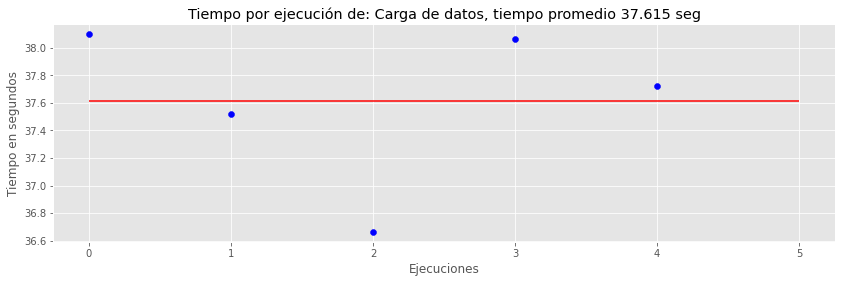

In [13]:
plot_time(load_data, name='Carga de datos')

In [14]:
df.columns

Index(['_id', 'id', 'created_at', 'post_id', 'comment_id', 'parent_id',
       'created_time', 'attachment', 'comment_count', 'like_count', 'from_id',
       'from_name', 'message', 'message_tags', 'message_google_json',
       'user_id'],
      dtype='object')

In [15]:
p = df.groupby('post_id').sum()

In [16]:
p.compute(scheduler='threads')

id  like_count  user_id
post_id                                                      
100215329303_10158876361954304    806703           1       18
100215329303_10158886822644304    537797           0       12
100215329303_10158888567359304    530864           1       12
100215329303_10158890753284304    266754           0        6
100215329303_10158890845764304    533502           0       12
...                                  ...         ...      ...
992762084202925_2383335971812189  272434           0        1
992762084202925_2390129677799485  279633           0        1
992762084202925_2398445170301269  583161           0        2
992762084202925_2405461639599622  328084           0        1
992762084202925_2408593375953115  334865           2        1

[16617 rows x 3 columns]

In [17]:
extract_name = []
for i in range(num):
    start_time = timeit.default_timer()
    df_org = dd.read_csv(file,
                         parse_dates=['created_at', 'created_time'],
                         dtype={'_id': str,
                         'id': int,
                         'post_id': str,
                         'comment_id':str,
                         'parent_id': str,
                         'attachment': str,
                         'comment_count': str,
                         'like_count': int,
                         'from_id': str,
                         'from_name': str,
                         'message': str,
                         'message_tags': str,
                         'message_google_json': str,
                         'user_id': int,
                         'place': str,
                         'source': str},
                         error_bad_lines=False,
                         engine="python",
                         encoding='utf-8',
                         blocksize=None)
    df_org['page_id'] = df_org.post_id.apply(lambda x: x.split('_')[0],
                                             meta=('post_id', 'object'))
    extract_name.append(timeit.default_timer() - start_time)

Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data


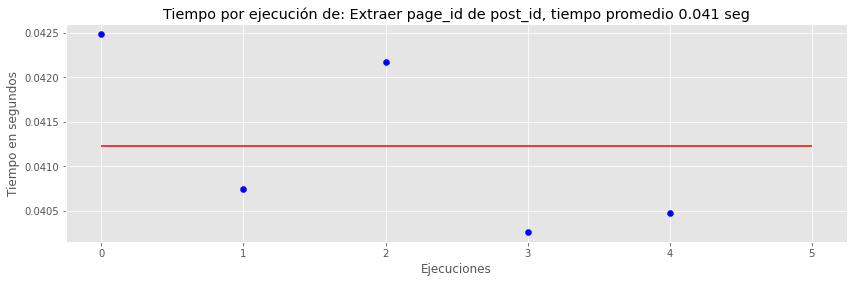

In [18]:
plot_time(extract_name, name='Extraer page_id de post_id')

In [19]:
df_org.head()

_id  id                       created_at  \
0  5eb99b6ea5f2a7c4cc612de8   1 2020-05-11 18:37:34.583000+00:00   
1  5eb99b70a5f2a7c4cc612de9   2 2020-05-11 18:37:35.903000+00:00   
2  5eb9a2293772a957c15946f0   3 2020-05-11 19:06:17.479000+00:00   
3  5eb9a22a3772a957c15946f1   4 2020-05-11 19:06:18.124000+00:00   
4  5eb9a22a3772a957c15946f2   5 2020-05-11 19:06:18.597000+00:00   

                            post_id                           comment_id  \
0   305223166594201_955151721601339      955151721601339_955152131601298   
1     66336374178_10159306658879179  10159306658879179_10159306675164179   
2  660918873998894_2945691988854893    2945691988854893_2949811961776229   
3  660918873998894_2945691988854893    2945691988854893_2949888485101910   
4  660918873998894_2945691988854893    2945691988854893_2949922401765185   

  parent_id              created_time  \
0       NaN 2020-05-11 15:07:22+00:00   
1       NaN 2020-05-11 15:21:28+00:00   
2       NaN 2020-05-10 15:49:19+00:00   
3       NaN 2020-05-10 16:26:28+00:00   
4       NaN 2020-05-10 16:43:20+00:00   

                                          attachment comment_count  \
0                                                NaN             1   
1                                                NaN             0   
2  {\n    "media": {\n        "image": {\n       ...             0   
3  {\n    "media": {\n        "image": {\n       ...             0   
4                                                NaN             0   

   like_count           from_id       from_name  \
0           0               NaN             NaN   
1           0               NaN             NaN   
2           0  3220466227963953    Gldys Fetiva   
3           0  3264987616899436    Jasmin Perez   
4           0  2914161475319276  Pedro Cardenas   

                                             message  \
0  Melissa Manuela yo no estaba mentalmente prepa...   
1                      Mira esa amor Victor Truyol P   
2                                                NaN   
3                                                NaN   
4                                        Bendiciones   

                                        message_tags message_google_json  \
0  [{'id': '1541947385935787', 'length': 7, 'name...                 NaN   
1  [{'id': '3755264431212294', 'length': 15, 'nam...                 NaN   
2                                                NaN                 NaN   
3                                                NaN                 NaN   
4                                                NaN                 NaN   

   user_id          page_id  
0        1  305223166594201  
1        1      66336374178  
2        1  660918873998894  
3        1  660918873998894  
4        1  660918873998894

## Agrupación por cuentas

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

In [20]:
g_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_org = dd.read_csv(file,
                         parse_dates=['created_at', 'created_time'],
                         dtype={'_id': str,
                         'id': int,
                         'post_id': str,
                         'comment_id':str,
                         'parent_id': str,
                         'attachment': str,
                         'comment_count': str,
                         'like_count': int,
                         'from_id': str,
                         'from_name': str,
                         'message': str,
                         'message_tags': str,
                         'message_google_json': str,
                         'user_id': int,
                         'place': str,
                         'source': str},
                         error_bad_lines=False,
                         engine="python",
                         encoding='utf-8',
                         blocksize=None)
    df_org['page_id'] = df_org.post_id.apply(lambda x: x.split('_')[0],
                                             meta=('post_id', 'str'))
    df_group_page_d = df_org.groupby('page_id').id.count()
    df_group_page = df_group_page_d.compute(scheduler='threads')
    g_data.append(timeit.default_timer() - start_time)

Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data


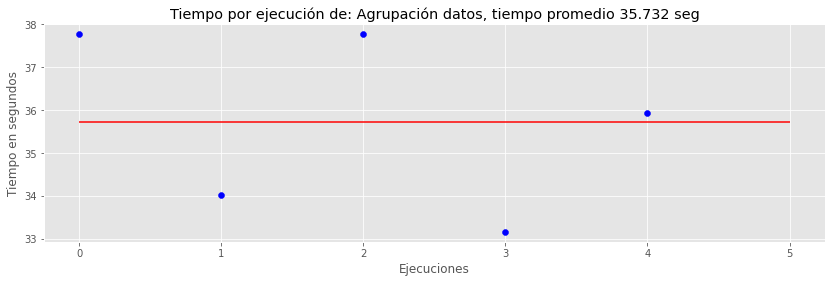

In [21]:
plot_time(g_data, name='Agrupación datos')

In [22]:
df_group_page.head()

page_id
100215329303        144
100741388001812     475
101606638202947    3551
101711747851266     646
101768651184639     991
Name: id, dtype: int64

In [23]:
s_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_page = df_group_page.sort_values(ascending=False)
    s_data.append(timeit.default_timer() - start_time)

In [24]:
df_group_page.head()

page_id
305223166594201     264722
525628307514837     110538
14302129065          98137
170642519755132      69768
1384867925069071     61890
Name: id, dtype: int64

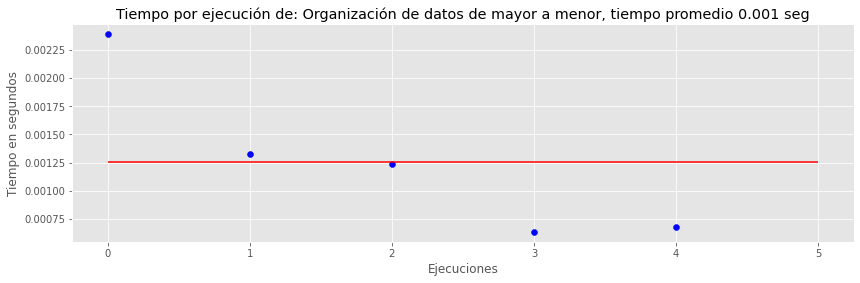

In [25]:
plot_time(s_data, name='Organización de datos de mayor a menor')

In [26]:
i_data = []
for i in range(num):
    start_time = timeit.default_timer()
    #df_group_page = pd.DataFrame(df_group_page)
    df_group_page_pd = df_group_page.reset_index(drop=False)
    i_data.append(timeit.default_timer() - start_time)

In [27]:
df_group_page

page_id
305223166594201     264722
525628307514837     110538
14302129065          98137
170642519755132      69768
1384867925069071     61890
                     ...  
172360639467236          1
762138500509432          1
189118521127350          1
209208822423532          1
138692002937549          1
Name: id, Length: 128, dtype: int64

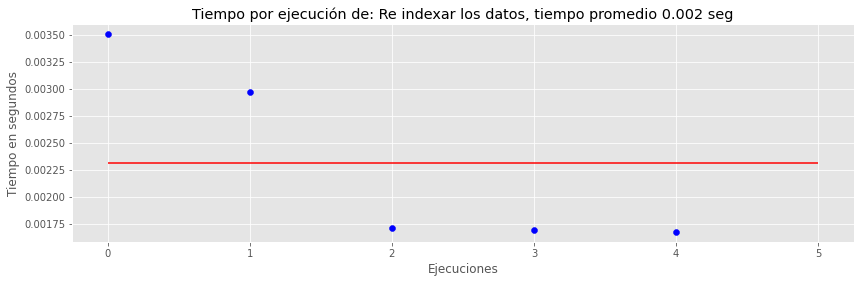

In [28]:
plot_time(i_data, name='Re indexar los datos')

## Agrupación de datos por cuentas y publicaciones

En esta prueba se realizaran las siguientes operaciones:
1. Se agrupan los comentarios por el id de la cuenta y la publicación es decir los comentarios por cuenta y publicación
2. Se organizan por la cantidad de comentarios
3. Se reinicia el indice de los datos resultantes

In [29]:
g_data2 = []
for i in range(num):
    start_time = timeit.default_timer()
    df = dd.read_csv(file,
        parse_dates=['created_at', 'created_time'],
        dtype={'_id': str,
               'id': int,
               'post_id': str,
               'comment_id':str,
               'parent_id': str,
               'attachment': str,
               'comment_count': str,
               'like_count': int,
               'from_id': str,
               'from_name': str,
               'message': str,
               'message_tags': str,
               'message_google_json': str,
               'user_id': int,
               'place': str,
               'source': str
              },
        error_bad_lines=False,
        engine="python",
        encoding='utf-8',
            blocksize=None)
    df['page_id'] = df.post_id.apply(lambda x: x.split('_')[0],
                                     meta=('post_id', 'str'))
    df_group_pub_d = df.groupby('post_id').agg({'page_id': 'last',
                                                'post_id': 'count'})
    df_group_pub = df_group_pub_d.compute()
    g_data2.append(timeit.default_timer() - start_time)

Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data
Skipping line 620: unexpected end of data


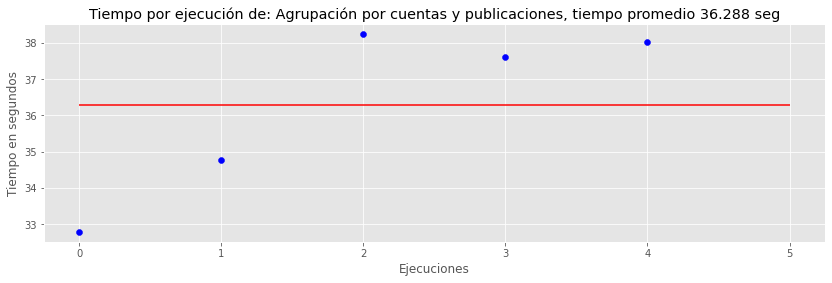

In [30]:
plot_time(g_data2, name='Agrupación por cuentas y publicaciones')

In [31]:
df_group_pub.head()

page_id  post_id
post_id                                              
100215329303_10158876361954304  100215329303        3
100215329303_10158886822644304  100215329303        2
100215329303_10158888567359304  100215329303        2
100215329303_10158890753284304  100215329303        1
100215329303_10158890845764304  100215329303        2

In [32]:
i_data = []
for i in range(num):
    start_time = timeit.default_timer()
    df_group_pub = df_group_pub.reset_index(drop=True)
    i_data.append(timeit.default_timer() - start_time)

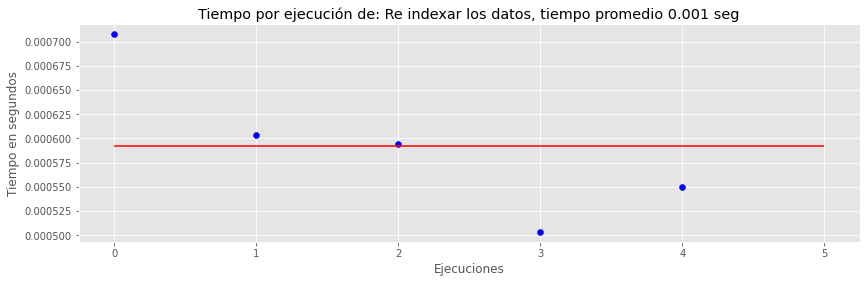

In [33]:
plot_time(i_data, name='Re indexar los datos')

In [34]:
df_group_pub.head()

page_id  post_id
0  100215329303        3
1  100215329303        2
2  100215329303        2
3  100215329303        1
4  100215329303        2

## Búsqueda de palabras en un dataframe

En este prueba se busca un vector de palabras dentro de los comentarios del dataframe, posteriormente estos datos se agruparan por cuenta

In [35]:
def words_filter(df, words):
    df_m = df.compute()
    df_m["word"] = None
    df_m.message = df_m.message.apply(lambda x: str(x).lower())
    for i in range(len(df_m)):
        for word in words:
            if str(df_m.message.iloc[i]).find(str(word)) > 0:
                df_m.word.iloc[i] = "ok"
            else:
                continue
    
    df_m_filter = df_m[df_m.word == "ok"]
    return df_m_filter

In [36]:
words = [['perro', 'coronavirus'], ['rappy', 'domicilios.com', 'uber'], ['whatsapp']]

In [37]:
num = 5
df = dd.read_csv(file,
    parse_dates=['created_at', 'created_time'],
    dtype={'_id': str,
           'id': int,
           'post_id': str,
           'comment_id':str,
           'parent_id': str,
           'attachment': str,
           'comment_count': str,
           'like_count': int,
           'from_id': str,
           'from_name': str,
           'message': str,
           'message_tags': str,
           'message_google_json': str,
           'user_id': int,
           'place': str,
           'source': str
          },
    error_bad_lines=False,
    engine="python",
    encoding='utf-8',
    blocksize=None)
df_2 = df
find_w = []
for i in range(num):
    start_time = timeit.default_timer()
    df_all_w = pd.DataFrame()
    for i in words:
        temp1 = words_filter(df_2, i)
        temp1['page_id'] = temp1.post_id.apply(lambda x: x.split('_')[0])
        temp2 = temp1.groupby("page_id", as_index=False).id.count()
        df_all_w = pd.concat([df_all_w, temp2])
    find_w.append(timeit.default_timer() - start_time)

Skipping line 620: unexpected end of data


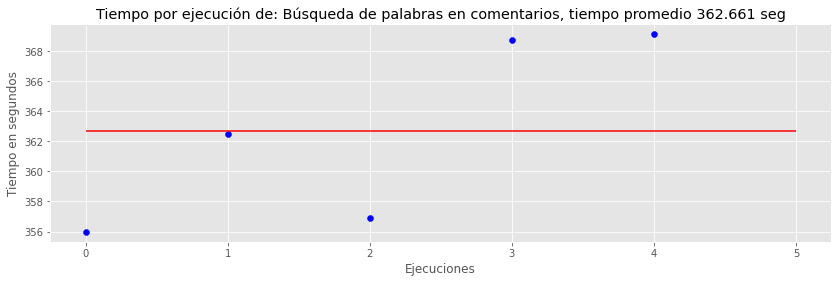

In [38]:
plot_time(find_w, name='Búsqueda de palabras en comentarios')

In [39]:
df_all_w

page_id   id
0    100741388001812    9
1    101606638202947    2
2    101711747851266    1
3   1119669518128815    1
4    114115315337739    1
..               ...  ...
36       66336374178   29
37        6657899956    3
38   674963205875675    2
39        9258148868  257
40       94960676664    1

[122 rows x 2 columns]